**Question 8** -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding

**Insights to be drawn** -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [12]:
from urllib.request import urlopen
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# store the response of URL
response = urlopen('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')

In [3]:
url_data=json.loads(response.read())

In [4]:
#Extracting required data from _embedded column from url_data
url_data = pd.DataFrame.from_records(url_data['_embedded']['episodes'])

In [5]:
#Changing all the columns in required format
url_data['airdate']=url_data['airdate'].astype('datetime64[ns]')
url_data['airtime']=pd.to_datetime(url_data['airtime']).dt.strftime("%I:%M %p")
url_data['runtime']=url_data['runtime'].astype('float')
url_data['rating']=url_data['rating'].apply(lambda x: x['average'])
url_data['medium_image_link']=url_data['image'].apply(lambda x: x['medium'])
url_data['original_image_link']=url_data['image'].apply(lambda x: x['original'])

In [6]:
#Extrating summary without html tag
from bs4 import BeautifulSoup as bs
url_data['summary']=url_data['summary'].apply(lambda x: bs(x,'html.parser').find('p').getText())

In [7]:
#Dropping columns that are not required in output extract
url_data.drop(['airstamp','image','_links'],axis=1,inplace=True)

In [8]:
url_data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


**Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.**

In [9]:
url_data.groupby('season').agg({'rating':'mean'})

,rating
season,
1,8.0900
2,8.0000
3,7.7750
4,7.5375


In [10]:
temp_df=url_data.groupby('season').agg({'rating':'mean'}).reset_index()

C:\Users\Upasana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average rating')

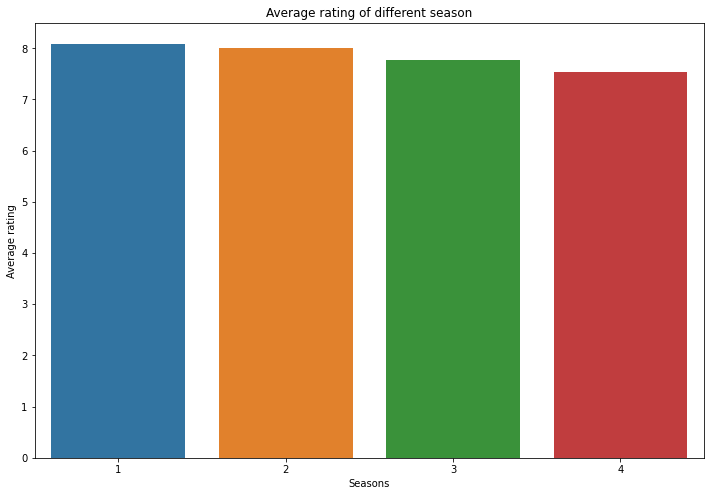

In [13]:
plt.figure(figsize=(12,8))
sns.barplot('season', 'rating', data=temp_df)
plt.title('Average rating of different season')
plt.xlabel('Seasons')
plt.ylabel('Average rating')

**Get all the episode names, whose average rating is more than 8 for every season**

In [14]:
url_data[url_data.rating>8].name.unique()

array(["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Kiksuya', 'Vanishing Point', 'The Passenger'], dtype=object)

In [15]:
url_data[url_data.rating>8].name.nunique()    #There are 6 episodes with rating more than 8

6

**Get all the episode names that aired before May 2019**

In [16]:
url_data['airdate_YYYYMM']=url_data['airdate'].dt.strftime('%Y-%m')

In [17]:
url_data[url_data.airdate_YYYYMM<'2019-05'].name.unique()

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger'],
      dtype=object)

In [18]:
url_data[url_data.airdate_YYYYMM<'2019-05'].name.nunique()      #There are 20 episodes that aired before May 2019

20

**Get the episode name from each season with the highest and lowest rating.**

In [19]:
for i in range(1,5):
    max_rating=url_data[(url_data.season==i)].rating.max()
    min_rating=url_data[(url_data.season==i)].rating.min()
    max_epi=url_data[(url_data.season==i)&(url_data.rating==max_rating)].index[0]
    min_epi=url_data[(url_data.season==i)&(url_data.rating==min_rating)].index[0]
    max_epi_name=url_data.iloc[max_epi]['name']
    min_epi_name=url_data.iloc[min_epi]['name']
    print(f'Episode of Season {i} with highest rating is {max_epi_name}.\n')
    print(f'Episode of Season {i} with lowest rating is {min_epi_name}.\n')

Episode of Season 1 with highest rating is The Bicameral Mind.

Episode of Season 1 with lowest rating is The Stray.

Episode of Season 2 with highest rating is Kiksuya.

Episode of Season 2 with lowest rating is Akane No Mai.

Episode of Season 3 with highest rating is Parce Domine.

Episode of Season 3 with lowest rating is Decoherence.

Episode of Season 4 with highest rating is Zhuangzi.

Episode of Season 4 with lowest rating is The Auguries.



**Get the summary for the most popular ( ratings ) episode in every season.**

In [20]:
for i in range(1,5):
    max_rating=url_data[(url_data.season==i)].rating.max()
    popular_epi=url_data[(url_data.season==i)&(url_data.rating==max_rating)].index[0]
    print(f'Summary of most popular episode of Season {i}:\n')
    print(str(url_data.iloc[popular_epi].summary),'\n')

Summary of most popular episode of Season 1:

Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative. 

Summary of most popular episode of Season 2:

Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering. 

Summary of most popular episode of Season 3:

If you're stuck in a loop, try walking in a straight line. 

Summary of most popular episode of Season 4:

God is bored. 

